<a href="https://colab.research.google.com/github/CeeCeeOkeke/PortfolioProject/blob/main/Portuguese_%22Vinho_Verde%22_wine_quality_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
vinho_verde = pd.read_csv('/content/WineQT.csv')

In [5]:
# checking the number of rows and coulumns
vinho_verde.shape

(1143, 13)

In [7]:
# first 5 rows of the vinho_verde
vinho_verde.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [8]:
#checking if there is empty row or column
vinho_verde.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [11]:
# removing the Id column
vinho_verde = vinho_verde.drop(columns='Id', axis=1)

Data Analysis and Visualisation

In [12]:
# statistical measures
vinho_verde.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
# checking the ratings for the quality
vinho_verde.value_counts('quality')

quality
5    483
6    462
7    143
4     33
8     16
3      6
dtype: int64

<Figure size 500x500 with 0 Axes>

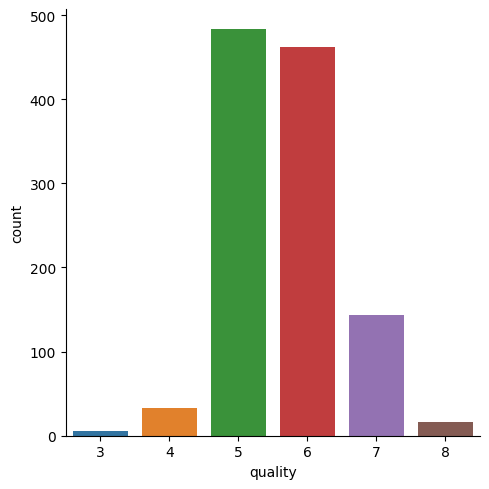

In [24]:
# number of values for each quality rating
plt = plt.figure(figsize=(5,5))
sns.catplot(x='quality', data= vinho_verde, kind= "count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

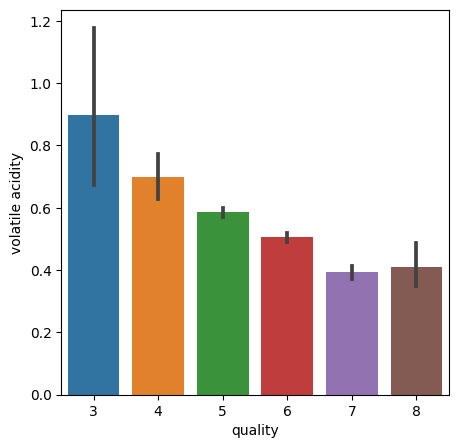

In [49]:
#residual sugar	 vs quality
plt = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y='volatile acidity', data= vinho_verde)

<Axes: xlabel='quality', ylabel='residual sugar'>

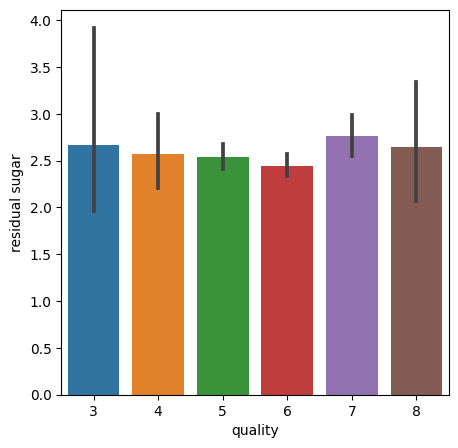

In [46]:
#volatile acidity vs quality
plt = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y='residual sugar', data= vinho_verde)

<Axes: xlabel='quality', ylabel='pH'>

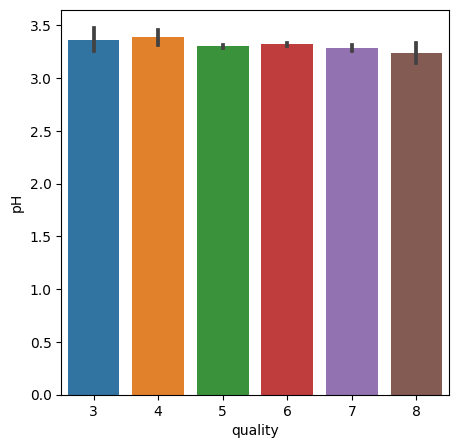

In [55]:
# pH vs quality
plt = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y='pH', data=vinho_verde)

<Axes: xlabel='quality', ylabel='citric acid'>

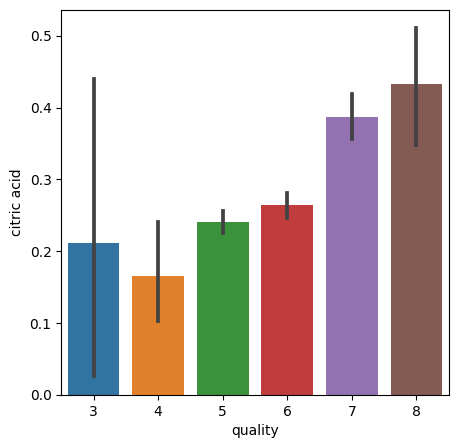

In [58]:
# citric acid vs quality
plt = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y='citric acid', data=vinho_verde)

Correlation

positive/negative

In [59]:
correlation = vinho_verde.corr()

<Axes: >

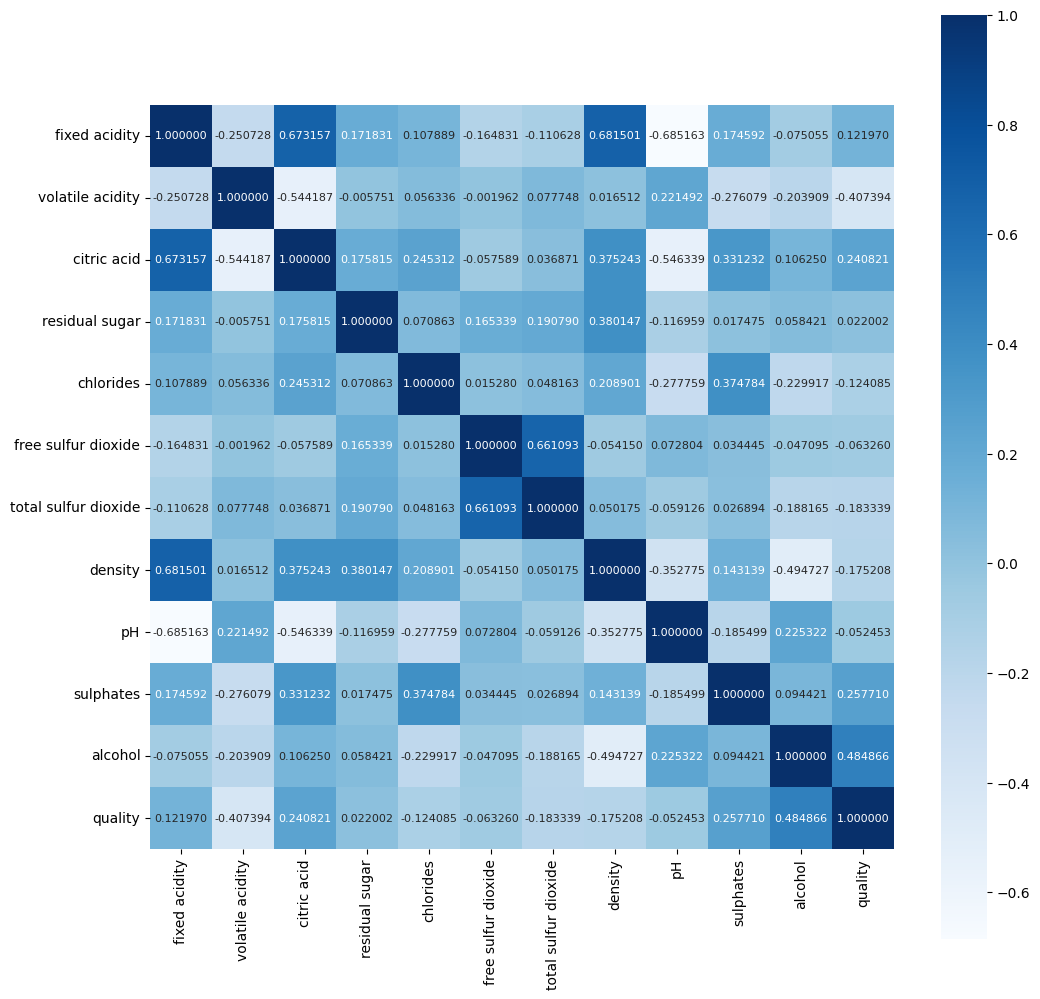

In [64]:
# constructing a heatmap a heatmap to understand the coulumns
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt= '1f', annot=True, annot_kws={'size' : 8}, cmap ='Blues' )

DATA PREPROCESSING

In [65]:
# separating the data and the label
X = vinho_verde.drop('quality', axis=1)

In [66]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

Label Binarization

In [67]:
Y = vinho_verde['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [68]:
# checking the value of Y
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1138    1
1139    1
1140    0
1141    1
1142    0
Name: quality, Length: 1143, dtype: int64


Training and Splitting the model

In [69]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.4, random_state=2)

In [71]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (685,) (458,)


Training the Model Using RANDOM FOREST CLASSIFIER

In [72]:
model = RandomForestClassifier()

In [75]:
#fiting in the model
model.fit(X_train,Y_train)

RandomForestClassifier()

Evaluation

In [82]:
#accuracy on training the model
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training the model is : ' , train_data_accuracy)

Accuracy on training the model is :  1.0


In [83]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on testing the model is :', test_data_accuracy)

Accuracy on testing the model is : 0.75764192139738


Building a Predictive System

In [84]:

input_data = (8,0.785,0.0,2.4,0.10400000000000001,14.0,30.0,0.9966,3.52,0.55,10)
#changing the input_data to a numpy_array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction) == 1:
  print('Quality Wine')
else:
  print('Not a Quality wine')

[1]
Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
